# by M. Yusuf Sarıgöz
### Google Developer Expert on Machine Learning, Lead at TensorFlow Turkey, AI Researcher at [AI Labs](https://ailabs.com.tr)

In this notebook, I'm releasing pretrained `tacotron2` and `Multiband MelGAN` models in German trained with `Thorsten dataset`. It support export to TF Lite and inference with quantization (only 33 MBs).

I'm interested in implementing / training speech and NLP models in non-English languages. Feel free to contact me for any kind of collaboration possibility --open-source or otherwise.

Find me on [GitHub](https://github.com/monatis), or reach me via [email](yusufsarigoz@gmail.com).

## Installation and Downloads

In [ ]:
!git clone https://github.com/monatis/TensorFlowTTS.git
%cd TensorFlowTTS
!git checkout savedmodel
!pip install .
!pip install tf-nightly

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 5251 (delta 69), reused 63 (delta 34), pack-reused 5132
Receiving objects: 100% (5251/5251), 81.53 MiB | 21.82 MiB/s, done.
Resolving deltas: 100% (3357/3357), done.
/content/TensorFlowTTS
Branch 'savedmodel' set up to track remote branch 'savedmodel' from 'origin'.
Switched to a new branch 'savedmodel'
Processing /content/TensorFlowTTS
     |████████████████████████████████| 320.4MB 29kB/s 
     |████████████████████████████████| 1.1MB 59.9MB/s 
     |████████████████████████████████| 184kB 53.3MB/s 
     |████████████████████████████████| 245kB 52.5MB/s 
     |████████████████████████████████| 225kB 51.8MB/s 
     |████████████████████████████████| 1.3MB 43.9MB/s 
     |████████████████████████████████| 1.7MB 48.5MB/s 
     |████████████████████████████████| 3.1MB 51.1MB/s 
  Cloning https://github.com/r

In [ ]:
# Run this cell if you need to restart after installation
%cd TensorFlowTTS

/content/TensorFlowTTS


In [ ]:
# Download MB MelGan
!wget https://www.dropbox.com/s/2k8ikhyu0qjsv2b/thorsten-mb_melgan-820533.h5?dl=1 -O thorsten-mbmelgan.h5

--2020-12-05 07:51:10--  https://www.dropbox.com/s/2k8ikhyu0qjsv2b/thorsten-mb_melgan-820533.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/2k8ikhyu0qjsv2b/thorsten-mb_melgan-820533.h5 [following]
--2020-12-05 07:51:10--  https://www.dropbox.com/s/dl/2k8ikhyu0qjsv2b/thorsten-mb_melgan-820533.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf4fe57a3b073a38c130cfe011.dl.dropboxusercontent.com/cd/0/get/BEcZ7Kas6Oyv95yhXzgi_ighOQSJd2sbCKlN9S2vvHgkF-h5-_x7h4aHMpZPqGTK0gfifu4vhFcOlGeZJL16AX2fyt8IEYjjUXXoQDTR7q0pibmZRlSg_elKjI8hyZVFMy8/file?dl=1# [following]
--2020-12-05 07:51:10--  https://uccf4fe57a3b073a38c130cfe011.dl.dropboxusercontent.com/cd/0/get/BEcZ7Kas6Oyv95yhXzgi_ighOQSJd2sbCKlN9S2vvHgkF-h5-_x7h4aHMpZPq

In [ ]:
# Download tacotron2
!wget https://www.dropbox.com/s/dzj8dpfj1a7ngrd/thorsten-tacotron2-97554.h5?dl=1 -O thorsten-tacotron2.h5

--2020-12-05 07:51:14--  https://www.dropbox.com/s/dzj8dpfj1a7ngrd/thorsten-tacotron2-97554.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/dzj8dpfj1a7ngrd/thorsten-tacotron2-97554.h5 [following]
--2020-12-05 07:51:14--  https://www.dropbox.com/s/dl/dzj8dpfj1a7ngrd/thorsten-tacotron2-97554.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc07a72ca77075cf98a60272d2de.dl.dropboxusercontent.com/cd/0/get/BEcowlxqdgGwiOoGrDnkBYsrUNbvuDp7SJda4-JJQiAQSnhRbpJAl8C4YVM-a3IsjimKxKwCgTRriq8AYaQ4Bd1k1OhzeyJwl8AgvnqAvSGp5ht6923VJP_xMboi16f0C6o/file?dl=1# [following]
--2020-12-05 07:51:14--  https://uc07a72ca77075cf98a60272d2de.dl.dropboxusercontent.com/cd/0/get/BEcowlxqdgGwiOoGrDnkBYsrUNbvuDp7SJda4-JJQiAQSnhRbpJAl8C4YVM-a3Is

## Imports and Model Initialization

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:44: UserWarning: You are currently using a nightly version of TensorFlow (2.5.0-dev20201204). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
tacotron2_config = AutoConfig.from_pretrained('./examples/tacotron2/conf/tacotron2.v1.yaml')
tacotron2_config.__dict__['vocab_size'] = 156
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="./thorsten-tacotron2.h5",
    name="tacotron2"
)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=5, win_back=5)

In [ ]:
mb_melgan_config = AutoConfig.from_pretrained('./examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="./thorsten-mbmelgan.h5",
    name="mb_melgan"
)

In [ ]:
processor = AutoProcessor.from_pretrained(pretrained_path="./tensorflow_tts/processor/pretrained/thorsten_mapper.json")

## Inference

In [ ]:
input_text = "Möchtest du das meiner Frau erklären? Nein? Ich auch nicht."

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    # tacotron-2 generate noise in the end symtematic, let remove it :v.
    if text2mel_name == "TACOTRON":
      remove_end = 1024
    else:
      remove_end = 1
    audio = vocoder_model.inference(mel_outputs)[0, :-remove_end, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

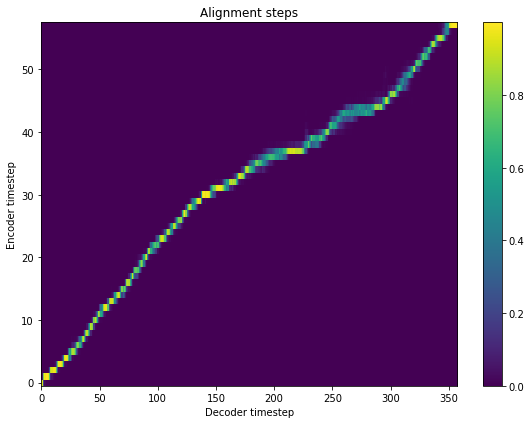

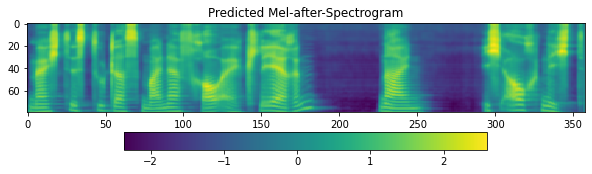

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

## Export to saved_model and Infer

In [ ]:
signatures = {
    "inference": tacotron2.inference.get_concrete_function(),
    "serving_default": tf.function(tacotron2.__call__, input_signature=[
                            #tf.TensorSpec([None, None], dtype=tf.int32, name="input_ids"),
            #tf.TensorSpec([None,], dtype=tf.int32, name="input_lengths"),
            tf.TensorSpec([None,], dtype=tf.int32, name="speaker_ids"),
            #tf.TensorSpec([None, None, 80], dtype=tf.float32, name="mel_gts"),
            #tf.TensorSpec([None,], dtype=tf.int32, name="mel_lengths")
      ]).get_concrete_function()
}
tf.saved_model.save(tacotron2, './thorsten-tacotron2', signatures=signatures)
# Uncomment to download
#!zip -r thorsten-tacotron2.zip ./thorsten-tacotron2
#from google.colab import files
#files.download('./thorsten-tacotron2.zip')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: ./thorsten-tacotron2/assets


INFO:tensorflow:Assets written to: ./thorsten-tacotron2/assets


  adding: thorsten-tacotron2/ (stored 0%)
  adding: thorsten-tacotron2/variables/ (stored 0%)
  adding: thorsten-tacotron2/variables/variables.index (deflated 72%)
  adding: thorsten-tacotron2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: thorsten-tacotron2/assets/ (stored 0%)
  adding: thorsten-tacotron2/saved_model.pb (deflated 91%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tf.saved_model.save(mb_melgan, './thorsten-mbmelgan', signatures=mb_melgan.inference.get_concrete_function(tf.TensorSpec(shape=[None, None, 80], dtype=tf.float32, name="mels")))

# Uncomment to download
#!zip -r thorsten-mbmelgan.zip ./thorsten-mbmelgan
#from google.colab import files
#files.download('./thorsten-mbmelgan.zip')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: ./thorsten-mbmelgan/assets


INFO:tensorflow:Assets written to: ./thorsten-mbmelgan/assets


  adding: thorsten-mbmelgan/ (stored 0%)
  adding: thorsten-mbmelgan/variables/ (stored 0%)
  adding: thorsten-mbmelgan/variables/variables.index (deflated 72%)
  adding: thorsten-mbmelgan/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: thorsten-mbmelgan/assets/ (stored 0%)
  adding: thorsten-mbmelgan/saved_model.pb (deflated 93%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tacotron2_loaded = tf.saved_model.load('./thorsten-tacotron2')
mb_melgan_loaded = tf.saved_model.load('./thorsten-mbmelgan')
input_ids = processor.text_to_sequence(input_text)
_, mel_outputs, _, _ = tacotron2_loaded.inference(
    tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
    tf.convert_to_tensor([len(input_ids)], dtype=tf.int32),
    tf.convert_to_tensor([0], dtype=tf.int32)
)
audio = mb_melgan_loaded.inference(mel_outputs)[0, :-1024, 0]
ipd.Audio(data=audio.numpy(), rate=22050)

## TF Lite Conversion and Inference

In [ ]:
# Recreate tacotron2 for TF Lite conversion
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="./thorsten-tacotron2.h5",
    name="tacotron2",
    enable_tflite_convertible=True
)
tacotron2.setup_window(win_front=5, win_back=5)

In [ ]:
# Convert tacotron2 to TF Lite
tacotron2_concrete_function = tacotron2.inference_tflite.get_concrete_function()
converter = tf.lite.TFLiteConverter.from_concrete_functions(
    [tacotron2_concrete_function]
)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

In [ ]:
# Save tacotron2 TF Lite model.
with open('thorsten-tacotron2.tflite', 'wb') as f:
  f.write(tflite_model)

print('Model size is %f MBs.' % (len(tflite_model) / 1024 / 1024.0) )

Model size is 33.544281 MBs.


In [ ]:
# Convert MB MelGAN  to TF Lite
mb_melgan_concrete_function = mb_melgan.inference_tflite.get_concrete_function()
converter = tf.lite.TFLiteConverter.from_concrete_functions(
    [mb_melgan_concrete_function]
)
converter.optimizations = [] # [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

In [ ]:
# Save MB MelGAN  TF Lite model.
with open('thorsten-mbmelgan.tflite', 'wb') as f:
  f.write(tflite_model)

print('Model size is %f MBs.' % (len(tflite_model) / 1024 / 1024.0) )

Model size is 9.748772 MBs.


In [ ]:
# Download TF Lite models
!zip thorsten-tflite.zip thorsten-tacotron2.tflite thorsten-mbmelgan.tflite
from google.colab import files
files.download('thorsten-tflite.zip')

updating: thorsten-tacotron2.tflite (deflated 38%)
updating: thorsten-mbmelgan.tflite (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load TFLite models and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='thorsten-tacotron2.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

mbmelgan_interpreter = tf.lite.Interpreter(model_path='thorsten-mbmelgan.tflite')
mbmelgan_interpreter.allocate_tensors()

# Get input and output tensors.
mbmelgan_input_details = mbmelgan_interpreter.get_input_details()
mbmelgan_output_details = mbmelgan_interpreter.get_output_details()

In [ ]:
# Prepare input for TF Lite
def prepare_input(input_ids):
  return (tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
          tf.convert_to_tensor([len(input_ids)], tf.int32),
          tf.convert_to_tensor([0], dtype=tf.int32))

In [ ]:
# Make inference with TF Lite
def infer_tflite(input_text, interpreter, mbmelgan_interpreter):
  input_ids = processor.text_to_sequence(input_text)
  interpreter.resize_tensor_input(input_details[0]['index'], [1, len(input_ids)])
  interpreter.allocate_tensors()
  input_data = prepare_input(input_ids)
  for i, detail in enumerate(input_details):
    interpreter.set_tensor(detail['index'], input_data[i])

  interpreter.invoke()

  # The function `get_tensor()` returns a copy of the tensor data.
  # Use `tensor()` in order to get a pointer to the tensor.
  mel_outputs = interpreter.get_tensor(output_details[0]['index'])
  mbmelgan_interpreter.resize_tensor_input(mbmelgan_input_details[0]['index'], mel_outputs.shape)
  mbmelgan_interpreter.allocate_tensors()
  mbmelgan_interpreter.set_tensor(mbmelgan_input_details[0]['index'], mel_outputs)
  mbmelgan_interpreter.invoke()

  # Get audio and remove noise at the end
  audio = mbmelgan_interpreter.get_tensor(mbmelgan_output_details[0]['index'])[0, :-1024, 0]
  return audio

In [ ]:
audio = infer_tflite(input_text, interpreter, mbmelgan_interpreter)
ipd.Audio(audio, rate=22050)